In [188]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime
#from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [189]:
#df = pd.read_csv(r'C:\Users\daniejackson\Desktop\eMergeEducation\Subfolder1\eMergeEducation')
#df = pd.read_csv(r'C:\Users\raguilarsoriano\OneDrive - Deloitte (O365D)\1. AI Academy\eMergeEducation\0. data.csv')
df = pd.read_csv('0. data.csv')


In [190]:
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [191]:
df.tail(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [193]:
# Select column names of object date type
sel_cols_float = list(df.select_dtypes(include='float'))

In [194]:
sel_cols_float

['Previous qualification (grade)',
 'Admission grade',
 'Curricular units 1st sem (grade)',
 'Curricular units 2nd sem (grade)',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

In [195]:
# Select column names of object date type
sel_cols_object = list(df.select_dtypes(include='object'))

In [196]:
sel_cols_object

['Target']

In [197]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

According to the dataset providers, extensive data preprocessing was conducted to address anomalies, unexplainable outliers, and missing values. Despite this effort, certain transformations are still required to prepare the dataset for the next phase, which involves model-building.

Surprisingly, it was discovered that all columns containing categorical data are encoded using a non-linear scale. While the reason for this unconventional encoding remains unknown, the meanings of the numbers are now understood. Therefore, we have decided to convert the existing non-linear scale into a linear one to ensure better interpretability and compatibility with the upcoming modeling process.

We must exercise caution when dealing with columns that have non-linear scales and unique values that should remain unchanged. Let's consider two specific examples to illustrate this point.

Firstly, the "grades" column contains numerical results aggregating student grades. It is crucial that we preserve the original values in this column, as any alteration may lead to inaccurate data representation or misinterpretation of academic performance. Therefore, we will refrain from making any changes to this column.

Conversely, we encounter the "father's qualifications" column, which represents the level of education attained by fathers. As previously mentioned, the numerical values associated with specific levels of education in this column do not follow a linear scale. To enhance the interpretability of this data and improve its visual representation, we should consider transforming the scale for this column.

The code below creates an histogram of every column. The idea is to create an hisitgram just for the column we wnat to change its scale to compare the frequency of the old values vs the new ones after the transformation scale is done as a visual validation that the process was well performed [Better ideas are accepted].   

In [198]:
'''

# Get the number of columns and calculate the number of rows needed for the subplots
num_cols = df.shape[1]
num_rows = (num_cols + 2) // 3  # Ensures at least 3 plots per line

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(df.columns):

    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black',
                                ax=axes[i])
    axes[i].set_title(f'Frequency Histogram for {col}')
    axes[i].set_xlabel('Unique Values')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any empty subplots if the number of columns is not divisible by 3
for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

'''

"\n\n# Get the number of columns and calculate the number of rows needed for the subplots\nnum_cols = df.shape[1]\nnum_rows = (num_cols + 2) // 3  # Ensures at least 3 plots per line\n\n# Create subplots with 3 columns\nfig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))\n\n# Flatten the axes array for easier iteration\naxes = axes.flatten()\n\n# Plot histograms for each column\nfor i, col in enumerate(df.columns):\n\n    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='black',\n                                ax=axes[i])\n    axes[i].set_title(f'Frequency Histogram for {col}')\n    axes[i].set_xlabel('Unique Values')\n    axes[i].set_ylabel('Frequency')\n    axes[i].grid(axis='y', linestyle='--', alpha=0.7)\n\n# Remove any empty subplots if the number of columns is not divisible by 3\nfor i in range(num_cols, num_rows * 3):\n    fig.delaxes(axes[i])\n\nplt.tight_layout()\nplt.show()\n\n"

The code below changes the scale of the column to iterate defined above. 

In [199]:

columns_to_iterate = ['Application mode', 'Application order', 'Course', 
                      'Nacionality',"Mother's qualification", "Father's qualification", "Mother's occupation",
                      "Father's occupation"]

def replace_values_linear_scale(df):

    # Iterate over each column in the dataset
    for col_name in columns_to_iterate:
        
        # Check if the data type of the column is integer
        # if df[col_name].dtype == 'int64':
            
            # Get the unique values in the column
            unique_values = df[col_name].unique()

            # Sort values in ascending order
            unique_values_sorted = sorted(unique_values, reverse=False)

            # Count the number of unique values in a column
            count = df[col_name].nunique()

            # Create a dictionary to store the old value - new value mapping
            value_mapping = {}

            # Generate a new list for values based on linear scaling
            new_values = list(range(1, count + 1))

            # Create a mapping of old values to new values based on the linear scale
            for i, old_val in enumerate(unique_values_sorted):
                new_val = new_values[i]
                value_mapping[old_val] = new_val

            # Replace values in the dataframe using the mapping
            df[col_name] = df[col_name].replace(value_mapping)
            
    return df
replace_values_linear_scale(df)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,6,2,1,1,122.0,1,13,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,2,11,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,6,5,1,1,122.0,1,22,27,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,3,15,1,1,122.0,1,23,27,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,2,3,0,1,100.0,1,22,28,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,7,15,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,3,15,1,1,120.0,19,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,2,12,1,1,154.0,1,22,27,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,2,9,1,1,180.0,1,22,27,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


#### we need to convert the TARGET column to numeric column to help us find the correlation with others

In [200]:
#To view the hoe the Target valuable looks 
df['Target'].unique()


array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [201]:
#we can see the three unique values,we can replace them with 0,1,2
df['Target'] = df['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [202]:
# Check Target column, it must have filled with 0, 1 & 2
df['Target'].unique()

array([0, 2, 1], dtype=int64)

We create a copy of df named df1.

In [203]:
df1 = df.copy()

In [204]:
# Iterate over each column in the dataset
for col_name in columns_to_iterate:
        
    # Get the unique values in the column
    unique_values = df[col_name].unique()
        
    # Sort values in ascending order
    unique_values_sorted = sorted(unique_values, reverse=False)

    # Count the number of unique values in a column
    count = df[col_name].nunique()
    
    # Print the column name and its unique values in ascednding order
    print(f"Column: {col_name}")
    print(count)
    print(unique_values_sorted)
    print("\n")

Column: Application mode
18
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


Column: Application order
8
[1, 2, 3, 4, 5, 6, 7, 8]


Column: Course
17
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


Column: Nacionality
21
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


Column: Mother's qualification
29
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


Column: Father's qualification
34
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]


Column: Mother's occupation
32
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


Column: Father's occupation
46
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]




## I check the code yesterday and it works. Which means values where changed correctly.

### The code below is supposed to ceate histogram for those colum that suffered from scale transformation. Need a few changes, I can do that later. - Robert

In [205]:
'''

# Get the number of columns and calculate the number of rows needed for the subplots
num_cols = df.shape[1]
num_rows = (num_cols + 2) // 3  # Ensures at least 3 plots per line

# Create subplots with 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(df.columns):
    df[col].value_counts().plot(kind='bar', color='orange', edgecolor='black',
                                ax=axes[i])
    axes[i].set_title(f'Frequency Histogram for {col}')
    axes[i].set_xlabel('Unique Values')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Remove any empty subplots if the number of columns is not divisible by 3
for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

'''

"\n\n# Get the number of columns and calculate the number of rows needed for the subplots\nnum_cols = df.shape[1]\nnum_rows = (num_cols + 2) // 3  # Ensures at least 3 plots per line\n\n# Create subplots with 3 columns\nfig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))\n\n# Flatten the axes array for easier iteration\naxes = axes.flatten()\n\n# Plot histograms for each column\nfor i, col in enumerate(df.columns):\n    df[col].value_counts().plot(kind='bar', color='orange', edgecolor='black',\n                                ax=axes[i])\n    axes[i].set_title(f'Frequency Histogram for {col}')\n    axes[i].set_xlabel('Unique Values')\n    axes[i].set_ylabel('Frequency')\n    axes[i].grid(axis='y', linestyle='--', alpha=0.7)\n\n# Remove any empty subplots if the number of columns is not divisible by 3\nfor i in range(num_cols, num_rows * 3):\n    fig.delaxes(axes[i])\n\nplt.tight_layout()\nplt.show()\n\n"

## EXPLOROTARY DATA ANALYSIS

 Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. During EDA, we carefully examine and summarize the main characteristics of our dataset to gain insights, detect patterns, identify potential problems, and formulate hypotheses .describing our data during EDA is fundamental for understanding, cleaning, and preparing the data for analysis. It provides insights into the dataset's characteristics and guides decision-making throughout the data analysis process.

In [206]:
#we need to find out how many dropouts, enrolled  and graduates are there intarget column

In [207]:
df['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

#### We want to find the correlation of the Target Variable (Target) with other numeric columns

In [208]:
# Plot the above values
x = df['Target'].value_counts().index
y = df['Target'].value_counts().values

df = pd.DataFrame({
    'Target': x,
    'Count_T' : y
})

fig = px.pie(df,
             names ='Target', 
             values ='Count_T',
            title='How many dropouts, enrolled & graduates are there in Target column')

fig.update_traces(labels=['Graduate','Dropout','Enrolled'], hole=0.4,textinfo='value+label', pull=[0,0.2,0.1])
fig.show()

In [209]:
df1

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,6,2,1,1,122.0,1,13,10,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,2,11,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,6,5,1,1,122.0,1,22,27,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,3,15,1,1,122.0,1,23,27,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,2,3,0,1,100.0,1,22,28,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,7,15,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,2
4420,1,1,3,15,1,1,120.0,19,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,2,12,1,1,154.0,1,22,27,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,2,9,1,1,180.0,1,22,27,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,2


### Let's see the correlation of the target with the rest


In [210]:
df1.corr()['Target'] # We could create a heat map to visualize all the relations more easily

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.090008
Course                                            0.007841
Daytime/evening attendance\t                      0.075107
Previous qualification                           -0.056039
Previous qualification (grade)                    0.103764
Nacionality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Admission grade                                   0.120889
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.4098

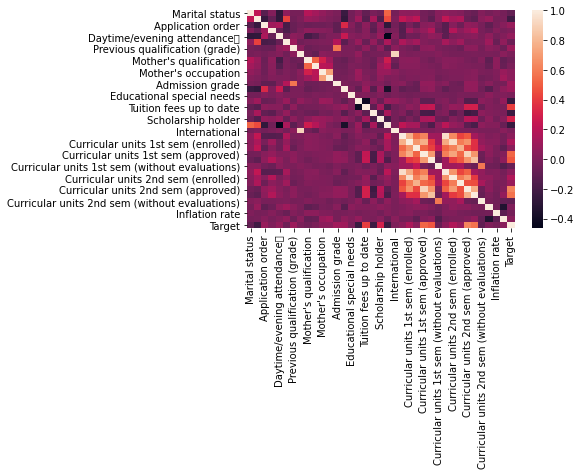

In [211]:
# plotting correlation heatmap
dataplot=sns.heatmap(df1.corr())
  
# displaying heatmap
plt.show()

Tuition fees up to date, curricular unist 1st sem (approved),  unist 1st sem (grade), 
curricular unist 2st sem (approved),  unist 2st sem (grade), 

##### Let's plot the column Curricular units 2nd sem (approved) againt Curricular units 1st sem (approved) and differentiate Target by color

In [212]:
fig = px.scatter(df1, 
             x = 'Curricular units 1st sem (approved)',
             y = 'Curricular units 2nd sem (approved)',
             color = 'Target')
fig.show()

In [213]:
fig = px.histogram(df1, 
             x = 'Curricular units 1st sem (enrolled)',
             y = 'Curricular units 2nd sem (enrolled)',
             color = 'Target')
fig.show()

In [214]:
fig = px.histogram(df1, y='Age at enrollment')
fig.show()

<AxesSubplot:xlabel='Age at enrollment', ylabel='Count'>

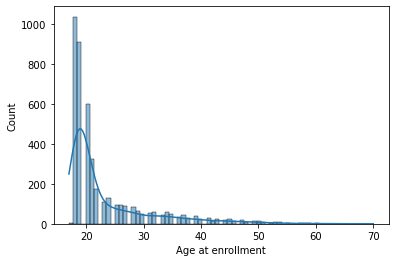

In [215]:
# Distribution of age of students at the time of enrollment
sns.histplot(data=df1['Age at enrollment'], kde=True)

## Model building: Next step is to combine "enrolled" class and "graduated" class as a single class. 

Given that our dataset covers an entire year of college, we can consider students who remained enrolled as graduates, as both categories essentially denote the same status.

In [216]:
df1['Target'].value_counts()

2    2209
0    1421
1     794
Name: Target, dtype: int64

In [217]:
# Define the mapping of old values to new values
value_mapping = {
    1: 2
}

# Replace the old values with new values in the specified column
df1['Target'].replace(value_mapping, inplace=True)

In [218]:
df1['Target'].value_counts()

2    3003
0    1421
Name: Target, dtype: int64

## Model building: Next step is to hot-encode

In [219]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [220]:
# Get the list of column names
column_names = df1.columns.tolist()
print(column_names)

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


In [221]:
df1['International'].unique()

array([0, 1], dtype=int64)

In [222]:
# Perform one-hot encoding on the categorical columns (Category1 and Category2)
df1_encoded = pd.get_dummies(df1, columns=['Marital status', 'Application mode', 'Application order', 
                                           'Course', 'Daytime/evening attendance\t', 'Previous qualification',
                                           'Nacionality', "Mother's qualification", "Father's qualification", 
                                           "Mother's occupation", "Father's occupation",'Displaced', 
                                           'Educational special needs', 'Debtor', 'Tuition fees up to date', 
                                           'Gender', 'Scholarship holder', 'Age at enrollment', 'International'
                                          ])

df1_encoded.shape

(4424, 308)

In [223]:
df1_encoded.columns

Index(['Previous qualification (grade)', 'Admission grade',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       ...
       'Age at enrollment_55', 'Age at enrollment_57', 'Age at enrollment_58',
       'Age at enrollment_59', 'Age at enrollment_60', 'Age at enrollment_61',
       'Age at enrollment_62', 'Age at enrollment_70', 'International_0',
       'International_1'],
      dtype='object', length=308)

## Create training and test sets

Before we do anything we'll want to split our data into **_training_** and **_test_** sets.  We'll accomplish this by first splitting the DataFrame into features (`X`) and target (`y`), then passing `X` and `y` to the `train_test_split()` function to split the data so that 70% of it is in the training set, and 30% of it is in the testing set.

In [224]:
X = df1.drop('Target', axis=1)  # Excluding the target column
y = df1['Target']

In [225]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

categorical_pipeline = Pipeline(
    steps=[
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
    ]
)

In [226]:
from sklearn.preprocessing import StandardScaler

numeric_pipeline = Pipeline(
    steps=[("impute", SimpleImputer(strategy="mean")), 
           ("scale", StandardScaler())]
)

In [227]:
cat_cols = X.select_dtypes(exclude="number").columns
num_cols = X.select_dtypes(include="number").columns

In [228]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_pipeline, num_cols),
        ("categorical", categorical_pipeline, cat_cols),
    ]
)

In [229]:
# Apply preprocessing
X_processed = full_processor.fit_transform(X)
y_processed = SimpleImputer(strategy="most_frequent").fit_transform(
    y.values.reshape(-1, 1)
)



In [230]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_processed, stratify=y_processed, random_state=1121218)


In [231]:
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
models=[("Logistic Regression", LogisticRegression()),
        ("HGB", HistGradientBoostingClassifier()),
        ("Bernoulli Naive Bayes", BernoulliNB())]

for name, model in models:
    kfold = KFold(n_splits=10)
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    print(f"\x1b[96m{name}\x1b[0m: \x1b[95m{results.mean():.4f}\x1b[0m ± {results.std():.4f}")

Logistic Regression: 0.8767 ± 0.0105


HGB: 0.8746 ± 0.0115
Bernoulli Naive Bayes: 0.8291 ± 0.0256


## Naive Bayes Model


Naive Bayes falls within the category of supervised learning algorithms known as Bayesian Classification. Employing probability for its predictive analysis, 

In [232]:
# importing classifier
from sklearn.naive_bayes import BernoulliNB

# initializaing the NB
bayes = BernoulliNB()


In [233]:
# training the model
bayes.fit(X_train, y_train)

BernoulliNB()

In [234]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, ConfusionMatrixDisplay

#We can evaluate using cross-validation
y_pred = cross_val_predict(bayes,X_test,y_test,cv=10)
##y_pred = bayes.predict(X_test)
accuracy_score(y_test, y_pred)

0.8282097649186256

## Histogram-based Gradient Boosting Classification Tree


Histogram-based gradient boosting is a technique employed in the training of quicker decision trees within the gradient boosting ensemble. This a model that requires a lot of effort while training, but since our dataset is not that big, it will not be a problem. Since we have a Classification type dataset, it is interesting to see the results with this model since it applies gradient boosting combined with decision trees while binning the data.



In [235]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

In [236]:
HGB = HistGradientBoostingClassifier(random_state=42)


Basically, the model is binning the data and passing it to the tree when splitting. Anyhow, we do not need to worry for missing values, eventhough the dataset is already cleaned with imputed values.

We can start by experimenting with the model with random hyperparameters, and then try prunning until we get better results.

In [237]:
hgb_clf = HistGradientBoostingClassifier(loss='binary_crossentropy',   
                                        learning_rate=0.1,          # regulates the contribution of each tree
                                        max_iter=150,               
                                        min_samples_leaf=15,
                                        max_depth=None,
                                        random_state=None,
                                        max_leaf_nodes=35           
                                        )

In [238]:
hgb_clf.fit(X_train, y_train)

y_pred_hgb = cross_val_predict(HGB,X_test,y_test,cv=10)

#hgb_preds = hgb_clf.predict(X_test)
accuracy_score(y_test, y_pred_hgb)


0.8517179023508138

#### Prunning the Histogram-based Gradient Boosting Classification Tree

We can start by adding an evaluation procedure to our model. We will use Grid Search technique.

In [239]:
from sklearn.model_selection import GridSearchCV, KFold

We will find the best value for our max iterations and evaluate with cross validation.

In [240]:
param_grid = {
    "learning_rate": (0.01, 0.1, 1, 10,100),
    "max_leaf_nodes": (3, 10, 30,40),
    "max_iter": (10, 20, 50, 100, 300, 500),
}


In [241]:
model_grid_search = GridSearchCV(HGB, param_grid=param_grid, n_jobs=2, cv=2)
model_grid_search.fit(X_train, y_train) 

GridSearchCV(cv=2, estimator=HistGradientBoostingClassifier(random_state=42),
             n_jobs=2,
             param_grid={'learning_rate': (0.01, 0.1, 1, 10, 100),
                         'max_iter': (10, 20, 50, 100, 300, 500),
                         'max_leaf_nodes': (3, 10, 30, 40)})

In [242]:

accuracy = model_grid_search.score(X_test, y_test)
print(
    f"Accuracy score of the grid-search pipeline is of: {accuracy:.2f}"
)

Accuracy score of the grid-search pipeline is of: 0.87


We should be careful with this accuracy, it would be better to apply a nested cross validation to evaluate our grid search, and then our model.

In [243]:
print(f"The best set of parameters is: {model_grid_search.best_params_}")


The best set of parameters is: {'learning_rate': 0.01, 'max_iter': 500, 'max_leaf_nodes': 10}


In [244]:
hgb_clf_tuned = HistGradientBoostingClassifier(loss='binary_crossentropy',   
                                        learning_rate=0.01,          #apply the best parameters to our model
                                        max_iter=500,               
                                        min_samples_leaf=15,
                                        max_depth=None,
                                        random_state=None,
                                        max_leaf_nodes=10           
                                        )

In [245]:
hgb_clf_tuned.fit(X_train, y_train)
hgb_tuned_preds = hgb_clf_tuned.predict(X_test)
accuracy_score(y_test, hgb_tuned_preds)

0.8761301989150091

In [246]:
model_grid_search.predict(X_test[0:5])


array([2, 2, 2, 0, 2], dtype=int64)

Let's evaluate the behavior with other parameters

In [247]:

cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False
)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_iter,param_max_leaf_nodes,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
21,3.247725,0.001011,0.049076,0.000057,0.01,500,10,"{'learning_rate': 0.01, 'max_iter': 500, 'max_...",0.875829,0.869801,0.872815,0.003014,1
33,0.321917,0.002301,0.008349,0.000981,0.1,50,10,"{'learning_rate': 0.1, 'max_iter': 50, 'max_le...",0.875829,0.867993,0.871911,0.003918,2
23,11.747035,0.077669,0.094997,0.017459,0.01,500,40,"{'learning_rate': 0.01, 'max_iter': 500, 'max_...",0.875829,0.866184,0.871007,0.004822,3
40,0.576189,0.028293,0.025653,0.000044,0.1,300,3,"{'learning_rate': 0.1, 'max_iter': 300, 'max_l...",0.875829,0.866184,0.871007,0.004822,3
37,0.639709,0.000166,0.012353,0.000300,0.1,100,10,"{'learning_rate': 0.1, 'max_iter': 100, 'max_l...",0.871007,0.869198,0.870102,0.000904,5


In [248]:

#Now we are getting the parameters names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += [
    "mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]

In [249]:
def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name


cv_results = cv_results.rename(shorten_param, axis=1)
cv_results

,param_learning_rate,param_max_leaf_nodes,param_max_iter,mean_test_score,std_test_score,rank_test_score
21,0.01,10,500,0.872815,0.003014,1
33,0.1,10,50,0.871911,0.003918,2
23,0.01,40,500,0.871007,0.004822,3
40,0.1,3,300,0.871007,0.004822,3
37,0.1,10,100,0.870102,0.000904,5
...,...,...,...,...,...,...
72,10,3,10,0.200121,0.030139,115
92,10,3,500,0.200121,0.030139,115
76,10,3,20,0.200121,0.030139,115
88,10,3,300,0.200121,0.030139,115


In [250]:

pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score",
    index=["param_learning_rate"],
    columns=["param_max_leaf_nodes"],
)

pivoted_cv_results

param_max_leaf_nodes,3,10,30,40
param_learning_rate,,,,
0.01,0.784509,0.799277,0.798925,0.798272
0.10,0.861111,0.866687,0.865632,0.865481
1.00,0.851015,0.844233,0.852672,0.851869
10.00,0.200121,0.264919,0.727547,0.708559
100.00,0.839361,0.598252,0.333635,0.333032


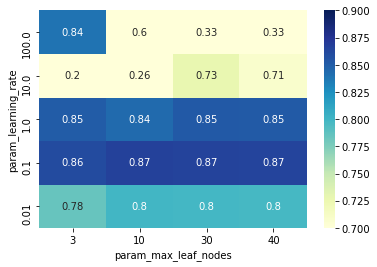

In [251]:

import seaborn as sns

ax = sns.heatmap(
    pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.7, vmax=0.9
)
ax.invert_yaxis()

When we have a higher value in the learning rate parameter our model basically gets an accuracy of most of our baseline model, even while using hyperparameter. It is interesting to see that this accuracy decreases exponencially if both learning rate and max_leaf_nodes are high, giving an accuracy of just 33%. But then, when we have a learning rate of just 0.1, then the change in the hyperparameter of max_leaf_nodes does not really make a difference, event though it increases.



## Neural Network Model

First, we need to identify the number of features that our current database has, in order to know the size of our output layer for the neural network.

In [252]:
# How big input layer?
n_features = (X_train.shape[1],)
print(n_features)

(36,)


Let's start by building a baseline model using Sequential() with two hidden layers. Since we do not have a validation set, let's make a val_set out of our training set.

In [253]:
from sklearn.model_selection import train_test_split
X_pure_train, X_val, y_pure_train, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.2)

In [263]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [270]:
from keras.models import Sequential
from keras import initializers
from keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Baseline model
np.random.seed(123)
baseline_model = Sequential()

# Hidden layer with 100 units
baseline_model.add(layers.Dense(100, activation='relu', input_shape=(n_features)))

# Hidden layer with 50 units
baseline_model.add(layers.Dense(50, activation='softmax'))

# Hidden layer with 50 units
baseline_model.add(layers.Dense(50, activation='relu'))
# Hidden layer with 50 units
baseline_model.add(layers.Dense(50, activation='relu'))



# Output layer
baseline_model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
baseline_model.compile(optimizer='adam', 
                       loss='binary_crossentropy', 
                       metrics=['accuracy'])

# Train the model
baseline_model.fit(X_train, 
                   y_train, 
                   batch_size=32, 
                   epochs=20, 
                   validation_data=(X_val, y_val))


Epoch 1/20
104/104 [==============================] - 0s 4ms/step - loss: -0.9845 - accuracy: 0.0000e+00 - val_loss: -4.6968 - val_accuracy: 0.0000e+00
Epoch 2/20
104/104 [==============================] - 0s 2ms/step - loss: -20.0359 - accuracy: 0.0000e+00 - val_loss: -46.0319 - val_accuracy: 0.0000e+00
Epoch 3/20
104/104 [==============================] - 0s 2ms/step - loss: -100.2601 - accuracy: 0.1121 - val_loss: -170.9133 - val_accuracy: 0.1596
Epoch 4/20
104/104 [==============================] - 0s 2ms/step - loss: -288.5775 - accuracy: 0.1444 - val_loss: -422.0746 - val_accuracy: 0.1687
Epoch 5/20
104/104 [==============================] - 0s 2ms/step - loss: -627.6876 - accuracy: 0.1447 - val_loss: -845.8373 - val_accuracy: 0.1822
Epoch 6/20
104/104 [==============================] - 0s 2ms/step - loss: -1150.3944 - accuracy: 0.1444 - val_loss: -1480.3378 - val_accuracy: 0.1747
Epoch 7/20
104/104 [==============================] - 0s 1ms/step - loss: -1906.2346 - accuracy: 0.1

In [261]:
# Evaluate the model on training data 
baseline_model.evaluate(X_train, y_train)

  1/104 [..............................] - ETA: 0s - loss: -56588336.0000 - accuracy: 0.0938

104/104 [==============================] - 0s 721us/step - loss: -55911160.0000 - accuracy: 0.1739


[-55911160.0, 0.17389993369579315]

In [256]:
#Now evaluate on validation set
baseline_model.evaluate(X_val, y_val)


 1/21 [>.............................] - ETA: 0s - loss: -39309548.0000 - accuracy: 0.2812

21/21 [==============================] - 0s 2ms/step - loss: -53447144.0000 - accuracy: 0.1717


[-53447144.0, 0.17168675363063812]

Now we can generate prediction on our validation data

In [257]:
# Generate predictions on validate data
y_val_preds = baseline_model.predict(X_val)


# Extra stuff, if not used we´ll remove it later

In [258]:
import time
start = time.time()
# print(datetime.now() - startTime)
print('It took', time.time()-start, 'seconds.')

It took 0.0 seconds.


In [259]:
## Model building: Next step is resampling  to address imbalanced classes. 

----Note: Do we want to give certain weight to each class? For example, do we give more importance to enrolled and dropout instead of graduate, or do we give 0 weight to all of the classes, I think this may be a good question for Stephen. I will include notes from our classes:

                                     

Let's look a the level of class imbalance in the dataset

print('Raw counts: \n')
print(df['Target'].value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(df['Target'].value_counts(normalize=True))

Based on the results, we can see that only 17.94% of the data corresponds to students with an "Enrolled" status

# Define appropriate X and y
y = df['Target']
X = df.drop('Target', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts()) 

-

print('Raw counts: \n')
print(y_test.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(y_test.value_counts(normalize=True))

SyntaxError: invalid syntax (<ipython-input-259-4db2dcb7aa5b>, line 3)